# Приоритизация гипотез. Анализ A/B-теста.

Заказчик: отдел маркетинга крупного интернет-магазина. 

Подготовилен список гипотез для увеличения выручки.

Задачи:
- приоритизировать гипотезы, 
- запустите A/B-тест и проанализируйте результаты.


##  Приоритизация гипотез.

Задача: 

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Как изменилась приоритизация гипотез при применении RICE вместо ICE. Почему так произошло.

###  *Загрузить данные.*

In [1]:
#импорт библиотек

import pandas as pd
import datetime as dt
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math
import scipy.stats as stats


In [2]:
#чтение файлов с данными и сохранение в соответствующую переменную
hypothesis = pd.read_csv('/datasets/hypothesis.csv') 
orders = pd.read_csv('/datasets/orders.csv', sep=',') 
visitors = pd.read_csv('/datasets/visitors.csv', sep=',') 

In [3]:
#увидеть всю длину строки
pd.options.display.max_colwidth = 1000
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


###  *ICE*

In [4]:
#посчитаем ICE для гипотез

hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'])\
/ hypothesis['Efforts']
hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Итак, наиболее перспективные гипотезы по ICE:
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

###  *RICE*

In [5]:
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000


In [6]:
#посчитаем RICE для гипотез

hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact']* hypothesis['Confidence']) \
/ hypothesis['Efforts']
hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Итак, наиболее перспективные гипотезы по RICE:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

 Cравнивая результаты приоритизации гипотез при применении фреймворк ICE и RICE, видим, что в том и в другом случае в приоритете остаются гипотезы:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	

Но при RICE гипотеза: 
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" 
переместилась на первое место. Это объсняется тем, что ее параметр Reach равен 10, в то время как у других гипотез он меньше. 

Важно учитывать: как много пользователей затронет гипотеза.

##  Анализ А/В-теста.

Задача:

- Проанализировать A/B-тест:

- построить график кумулятивной выручки по группам, выводы и предположения.
- построить график кумулятивного среднего чека по группам, выводы и предположения.
- построить график относительного изменения кумулятивного среднего чека группы B к группе A, выводы и предположения.
- построить график кумулятивной конверсии по группам, выводы и предположения.
- построить график относительного изменения кумулятивной конверсии группы B к группе A, выводы и предположения.
- построить точечный график количества заказов по пользователям, выводы и предположения.
- посчитать 95-й и 99-й перцентили количества заказов на пользователя, выберать границу для определения аномальных пользователей.
- построитьточечный график стоимостей заказов, выводы и предположения.
- посчитать 95-й и 99-й перцентили стоимости заказов, выберать границу для определения аномальных заказов.
- посчитать статистическую значимость различий в конверсии между группами по «сырым» данным, выводы и предположения.
- посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным, выводы и предположения.
- посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным, выводы и предположения.
- посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным, выводы и предположения.
- принять решение по результатам теста и объясните его, варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

### Стабильность кумулятивных метрик.

#### *Кумулятивная выручка по группам.*

In [7]:
orders.head() 


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
visitors.head() 

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
# преобразование данных в тип data
time_format = '%Y-%m-%d'
orders['date'] = pd.to_datetime(orders['date'], \
                                          format = time_format)
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
# преобразование данных в тип data
visitors['date'] = pd.to_datetime(visitors['date'], \
                                          format = time_format)
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Проверим группы А и В на наличие пересечений в пользователях.

In [11]:
#разделим общий датафрейм по группам А и В
ordersA = orders.loc[orders['group'] == 'A']
ordersB = orders.loc[orders['group'] != 'A']

In [12]:
orders.count()

transactionId    1197
visitorId        1197
date             1197
revenue          1197
group            1197
dtype: int64

In [13]:
#найдем пересечение по пользователям в группах
s1 = pd.merge(ordersA, ordersB, on=['visitorId'], how='inner')
s1

,transactionId_x,visitorId,date_x,revenue_x,group_x,transactionId_y,date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,400,A,1473132782,2019-08-12,640,B
1,2223239646,199603092,2019-08-15,3488,A,437656952,2019-08-02,3488,B
2,62794304,199603092,2019-08-22,6976,A,437656952,2019-08-02,3488,B
3,2971973105,199603092,2019-08-27,2790,A,437656952,2019-08-02,3488,B
4,1941707234,199603092,2019-08-12,6438,A,437656952,2019-08-02,3488,B
...,...,...,...,...,...,...,...,...,...
178,3757656646,4186807279,2019-08-14,4990,A,1759418862,2019-08-21,18560,B
179,3757656646,4186807279,2019-08-14,4990,A,380064637,2019-08-27,13740,B
180,3612788481,2712142231,2019-08-14,2490,A,1251767592,2019-08-16,790,B
181,4052155355,2949041841,2019-08-14,190,A,1329499668,2019-08-14,10380,B


Пересечение найдено - это 183 строки в данных, где один пользователь попадает и в группу А и в группу В. Так как у нас нет возможности установить точно к какой же именно группе относятся эти пользователи, было принято решение: удалить данные по этим пользователям.

In [14]:
orders.drop(s1.index, axis=0, inplace=True)

In [15]:
orders.count()

transactionId    1014
visitorId        1014
date             1014
revenue          1014
group            1014
dtype: int64

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
183,2019-08-23,B
184,2019-08-23,A
186,2019-08-17,B
187,2019-08-17,A
190,2019-08-02,A


In [17]:
#Cоберём агрегированные кумулятивные по дням данные о заказах.
#Вычислим максимальную дату. Для группы тоже рассчитаем максимум, 
#Найдём число уникальных заказов и пользователей. Подсчитаем сумму средних чеков:
ordersAggregated = datesGroups.apply\
(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
                                 orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', \
      'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
190,2019-08-02,A,19,18,90782
193,2019-08-02,B,21,20,123576
291,2019-08-03,A,43,42,203255
310,2019-08-03,B,37,36,237824
499,2019-08-04,A,59,57,274080


In [18]:
#получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitorsAggregated = datesGroups.apply(lambda x:\
            visitors[np.logical_and(visitors['date'] <= x['date'], \
                                    visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group']) 

visitorsAggregated.head()


,date,group,visitors
190,2019-08-02,A,1338
193,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803
499,2019-08-04,A,2562


In [19]:
# объединяем кумулятивные данные в одной таблице 
# и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head() 

,date,group,orders,buyers,revenue,visitors
0,2019-08-02,A,19,18,90782,1338
1,2019-08-02,B,21,20,123576,1294
2,2019-08-03,A,43,42,203255,1845
3,2019-08-03,B,37,36,237824,1803
4,2019-08-04,A,59,57,274080,2562


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

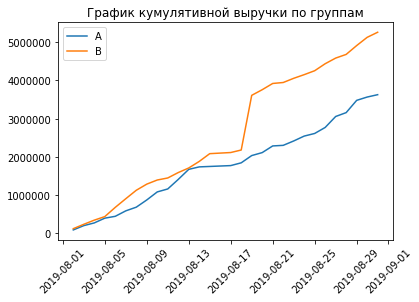

In [20]:
# датафрейм с кумулятивным количеством заказов и 
#кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A']\
[['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# датафрейм с кумулятивным количеством заказов и 
#кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B']\
[['date','revenue', 'orders']]

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 

plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation=45)

В середине теста сегмент В вырвался вперед и продолжал лидировать весь остаток теста. Необходимо проверить присутствие аномально больших заказов, которые могут влиять на результаты теста.

#### *Кумулятивный средний чек по группам.*

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

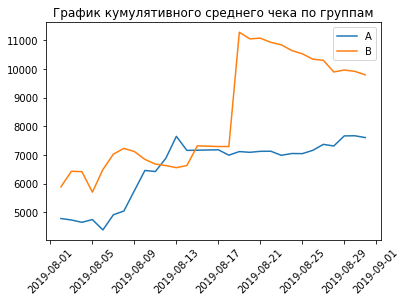

In [21]:
#для каждой группы постройте графики кумулятивного среднего чека по дням

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']\
         /cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']\
         /cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation=45)

Так же в середине теста В резко вышел вперед и не смотря на спад все равно остается в лидерах - требуется дополнительный анализ выбросов.

#### *Относительное изменение кумулятивного среднего чека гр.В к гр А.*

In [22]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,\
            left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-02,90782,19,123576,21
1,2019-08-03,203255,43,237824,37
2,2019-08-04,274080,59,346395,54
3,2019-08-05,398298,84,438823,77
4,2019-08-06,446782,102,681165,105


(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

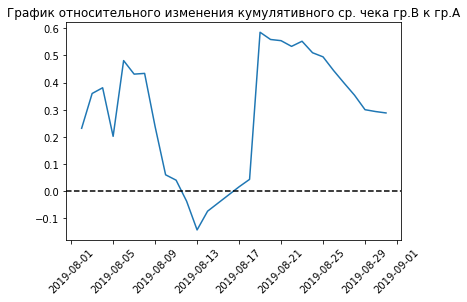

In [23]:
# построим график относительно различия кумулятивного среднего чека 
#группы B к группе A.
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']\
/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']\
                                      /mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного ср. чека гр.В к гр.А')
plt.xticks(rotation=45)

Результаты теста значительно и резко менялись в несколько дат. Скорее всего тогда и были совершены аномально большие заказы. Судя по графику сегмент В упал в середине теста, но потом вырвался вперед и, не смотря на спад в дальнейшем, все же оставался впереди.

#### *Кумулятивная конверсия по группам*

In [24]:
# добавим столбец 'conversion' c отношением числа заказов
# к количеству пользователей в указанной группе в указанный день
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.tail()

,date,group,orders,buyers,revenue,visitors,conversion
52,2019-08-29,B,493,455,4911729,17708,0.027841
53,2019-08-30,A,465,430,3565546,18037,0.025780
54,2019-08-30,B,517,478,5126962,18198,0.028410
55,2019-08-31,A,477,440,3627379,18736,0.025459
56,2019-08-31,B,537,497,5260091,18916,0.028389


In [25]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']



(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300.]),
 <a list of 8 Text xticklabel objects>)

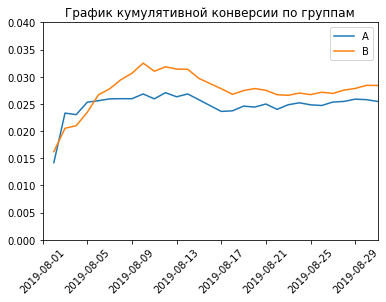

In [26]:
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.04])
plt.xticks(rotation=45)

В начале теста сегмент А и В имели примерно одинаковую конверсию, но сегмент В вышел вперед и зафиксировался примерно возле одного значения больше значения сегмента А.

#### *Относительное изменение кумулятивной конверсии по группам*

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].\
merge(cumulativeDataB[['date','conversion']], left_on='date', \
      right_on='date', how='left', suffixes=['A', 'B'])



No handles with labels found to put in legend.


(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300.]),
 <a list of 8 Text xticklabel objects>)

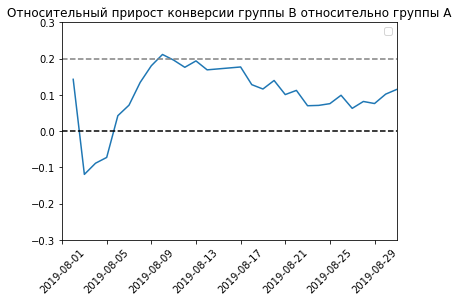

In [28]:
#построим график относительного различия кумулятивной конверсии группы B к группе A

plt.plot(mergedCumulativeConversions['date'],\
         mergedCumulativeConversions['conversionB']\
         /mergedCumulativeConversions['conversionA']-1)
plt.legend()
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.3])
plt.xticks(rotation=45)

В начале теста конверсия группы B резко упала, затем вырвалась вперёд. Потом её конверсия плавно снова падала, но теперь постепенно растёт.
Делать какие-либо выводы по тесту рано. Сперва стоит проанализировать аномалии, возможно, они изменят картину.

### Анализ выбросов и всплесков: крайние значения данных.

#### *Количество заказов на пользователя.*

In [29]:
orders.head()

,transactionId,visitorId,date,revenue,group
183,2234615357,1741803981,2019-08-23,5740,B
184,1367815478,138252163,2019-08-23,4580,A
185,716439623,1129369369,2019-08-23,1840,A
186,3306480450,206724078,2019-08-17,3488,B
187,2048878902,4256040402,2019-08-17,1550,A


In [30]:
#найдем число заказов по пользователям
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1)\
.groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
504,2458001652,10
883,4256040402,9
482,2378935119,6
409,2038680547,6
246,1230306981,5
766,3717692402,5
783,3803269165,4
327,1614305549,4
527,2587333274,4
339,1668030113,3


Построим точечный график количества заказов по пользователям. 

Text(0.5, 1.0, 'График количества заказов по пользователям')

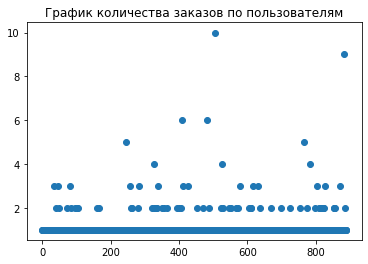

In [31]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График количества заказов по пользователям')

Пользователей заказавших более 2-х раз совсем мало. Они вполне могут быть аномальными.

Посчитаем 95-й и 99-й перцентили количества заказов по пользователям.

In [32]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2.  , 3.11])

Не более 5% пользователей совершили более 2-х заказов и не более 1% сделали более 3-х заказов. Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

#### *Стоимость заказов на пользователя.*

Построим точечный график стоимостей заказов. 

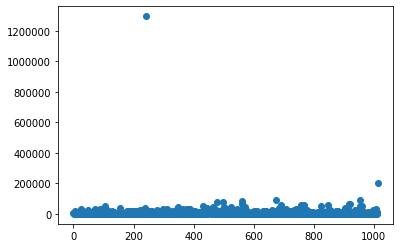

In [33]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 

Заказов стоимостью выше 150 тыс. очень мало. Можно заметить выбросы в районе 200 тыс. и в районе чуть больше 1 120 тыс. Заказ на сумму больше 1 млн. руб в интернет-магазине выглядит весьма аномально.

Посчитаем 95-й и 99-й выборочные перцентили выручки с заказов.

In [34]:
np.percentile(orders['revenue'], [95, 99])

array([28490., 60203.])

Не более у 5% заказов чек дороже 28 490 руб. И не больше чему у 1% заказов - дороже 60 203 руб. 

### Статистическая значимость различий в конверсии и среднем чеке между группами.

#### Расчет по «сырым» данным — без удаления аномальных пользователей.


 - Статистическая значимость различия в конверсии между группами по "сырым" данным.

1) Сформулируем нулевую гипотезу (Н0):

"В конверсии между группами статистических различий нет"

2) Альтернативная гипотеза (Н1):

"В конверсии между группами статистические различия есть."

In [35]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [36]:
orders.head()

,transactionId,visitorId,date,revenue,group
183,2234615357,1741803981,2019-08-23,5740,B
184,1367815478,138252163,2019-08-23,4580,A
185,716439623,1129369369,2019-08-23,1840,A
186,3306480450,206724078,2019-08-17,3488,B
187,2048878902,4256040402,2019-08-17,1550,A


Подготовим данные.

In [37]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head())

#создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'],
#где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

#объявим переменные sampleA и sampleB, в которых пользователям 
#с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
                                    .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
                                    .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

#посчитаем статистическую значимость различия конверсии,
#применив тест Манна-Уитни

#display("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

alpha = .05

if (stats.mannwhitneyu(sampleA, sampleB)[1]) < alpha:
    
    print("Отвергаем нулевую гипотезу, p_value = ", \
          ("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])))
else:
    print("Не получилось отвергнуть нулевую гипотезу, p_value = ", \
         ("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))) 

    #вычислим относительное различие в конверсии между группами

display("Относительное различие конверсии: " "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-02,19,90782,21,123576,19,90782,21,123576,619,581,1338,1294
1,2019-08-03,24,112473,16,114248,43,203255,37,237824,507,509,1845,1803
2,2019-08-04,16,70825,17,108571,59,274080,54,346395,717,770,2562,2573
3,2019-08-05,25,124218,23,92428,84,398298,77,438823,756,707,3318,3280
4,2019-08-06,18,48484,28,242342,102,446782,105,681165,667,655,3985,3935


Отвергаем нулевую гипотезу, p_value =  0.04538


'Относительное различие конверсии: 0.112'

Статистическая значимость меньше 0.05, потому нулевую гипотезу (Н0) отвергаем, т.е. анализ "сырых" данных сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии А равен 11,2%. 

 - Статистическая значимость различия средних чеков между группами по "сырым" данным.

1) Сформулируем нулевую гипотезу (Н0):

"В среднем чеке между группами статистических различий нет"

2) Альтернативная гипотеза (Н1):

"В среднем чеке между группами статистические различия есть."

In [38]:
#display('{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                            #orders[orders['group']=='B']['revenue'])[1]))
    
alpha = .05

if (stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                            orders[orders['group']=='B']['revenue'])[1]) < alpha:
    
    print("Отвергаем нулевую гипотезу, p_value = ", \
          ('{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                            orders[orders['group']=='B']['revenue'])[1])))
else:
    print("Не получилось отвергнуть нулевую гипотезу, p_value = ", \
          ('{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                            orders[orders['group']=='B']['revenue'])[1]))) 
    
    
display("Относительное различие среднего чека: "'{0:.3f}'.format(orders[orders['group']=='B']['revenue']\
                       .mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Не получилось отвергнуть нулевую гипотезу, p_value =  0.45471


'Относительное различие среднего чека: 0.288'

Статистическая значимость больше 0.05 - статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами 28.8%.

#### Расчет по «очищенным» данным  о заказах — не включая аномальных пользователей.

- Статистическая значимость различия в конверсии между группами по "очищенным" данным.

1) Сформулируем нулевую гипотезу (Н0):

"В конверсии между группами статистических различий нет"

2) Альтернативная гипотеза (Н1):

"В конверсии между группами статистические различия есть."

Выше были найдены 95-й и 99-й перцентили средних чеков - 28 490 руб. и 60 203 руб. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 3 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 58 600 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 58 600 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [39]:
ordersByUsersA.head()

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,85103373,1


In [40]:
#посчитаем сколько всего аномальных пользователей

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58600]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormalUsers.head(5))
display("Количество аномальных пользователей: ", abnormalUsers.shape) 



1099     148427295
21       237748145
949      887908475
744      888512513
1103    1164614297
Name: visitorId, dtype: int64

'Количество аномальных пользователей: '

(23,)

Всего 23 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 

In [41]:
#cоздадим переменные sampleAFiltered и sampleBFiltered, 
#в которых сохраните очищенные данные о заказах — не включая аномальных пользователей.

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

#применим статистический критерий Манна-Уитни к полученным выборкам:
#display('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

alpha = .05

if (stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]) < alpha:
    
    print("Отвергаем нулевую гипотезу, p_value = ",\
          ('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])))
else:
    print("Не получилось отвергнуть нулевую гипотезу, p_value = ", \
          ('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))) 
    

#выведим относительный прирост конверсии очищенной группы B, округлив до трёх знаков после запятой
display("Относительное различие в конверсии: " '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Отвергаем нулевую гипотезу, p_value =  0.02912


'Относительное различие в конверсии: 0.139'

Результаты по конверсии практически не изменились. 

- Статистическая значимость различия средних чеков между группами по "очищенным" данным.

1) Сформулируем нулевую гипотезу (Н0):

"В среднем чеке между группами статистических различий нет"

2) Альтернативная гипотеза (Н1):

"В среднем чеке между группами статистические различия есть."

In [42]:
orders.head()

,transactionId,visitorId,date,revenue,group
183,2234615357,1741803981,2019-08-23,5740,B
184,1367815478,138252163,2019-08-23,4580,A
185,716439623,1129369369,2019-08-23,1840,A
186,3306480450,206724078,2019-08-17,3488,B
187,2048878902,4256040402,2019-08-17,1550,A


In [43]:
alpha = .05

if (
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    ) < alpha:
    
    print("Отвергаем нулевую гипотезу, p_value = ", ('{0:.5f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )))
else:
    print("Не получилось отвергнуть нулевую гипотезу, p_value = ", ('{0:.5f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )))



display("Относительное различие в конверсии: "
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Не получилось отвергнуть нулевую гипотезу, p_value =  0.41751


'Относительное различие в конверсии: 0.014'

Статистическая значимость различия средних чеков между группами уменьшилась, и разница между сегментами сократилась с 28.8% до 1.4%. То есть после удаления выбросов в данных стало меньше шума.

## ОБЩИЕ ВЫВОДЫ: 

Проведя анализ теста, пришли к следующим фактам:

- Статистическая значимость меньше 0.05 (0.045), потому нулевую гипотезу (Н0) отвергаем, т.е. анализ "сырых" данных сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии А равен 11,2%. 

- Статистическая значимость больше 0.05 (0.454) - статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами 28.8%.

- Результаты по конверсии по "очищенным" данным практически не изменились: Статистическая значимость меньше 0.05 (0.029), потому нулевую гипотезу отвергаем, т.е. в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии А равен 13,9%.. 

- Статистическая значимость различия средних чеков между группами уменьшилась c 0.454 до 0.418, но та как больше 0.05, поэтому нулевую гипотезу не отвергаем. Разница между сегментами сократилась с 28.8% до 1.4%. То есть после удаления выбросов в данных стало меньше шума.


График различия конверсии между группами сообщает:

- В начале теста конверсия группы B резко упала, затем вырвалась вперёд. Потом её конверсия плавно снова падала, но теперь постепенно растёт.

График различия среднего чека говорит о том, что:

- Судя по графику сегмент В упал в середине теста, но потом вырвался вперед и, не смотря на спад в дальнейшем, все же оставался впереди.


Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В.